In [41]:
import keras
from keras.datasets import fashion_mnist, cifar10

In [42]:
(X_train, y_train) , (X_test, y_test) =  fashion_mnist.load_data()

In [43]:
X_train.shape

(60000, 28, 28)

In [44]:
X_test.shape

(10000, 28, 28)

In [45]:
import matplotlib.pyplot as plt
import numpy as np

In [46]:
def drawImg(img):
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.show()

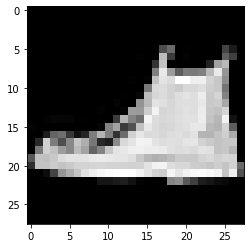

In [47]:
drawImg(X_train[450])

In [48]:
y_train[450]

9

# CNN

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten 
from keras.utils import to_categorical

In [50]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size= (3,3), activation ='relu', input_shape =(28,28,1) ))
model.add(MaxPool2D(pool_size= (2,2) ))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size= (2,2) ))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", ))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 3, 3, 32)          18464     
_________________________________________________________________
flatten_11 (Flatten)         (None, 288)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2890      
Total para

In [51]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [52]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [53]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics= ['accuracy'])

In [54]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28,28, 1)

In [55]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 77s 1ms/step - loss: 0.9095 - acc: 0.7923 - val_loss: 0.4018 - val_acc: 0.8565
Epoch 2/10
54000/54000 [==============================] - 58s 1ms/step - loss: 0.3659 - acc: 0.8694 - val_loss: 0.3448 - val_acc: 0.8720
Epoch 3/10
54000/54000 [==============================] - 66s 1ms/step - loss: 0.3249 - acc: 0.8827 - val_loss: 0.3434 - val_acc: 0.8750
Epoch 4/10
54000/54000 [==============================] - 68s 1ms/step - loss: 0.3031 - acc: 0.8889 - val_loss: 0.3172 - val_acc: 0.8795
Epoch 5/10
26912/54000 [=============>................] - ETA: 31s - loss: 0.2777 - acc: 0.8983

KeyboardInterrupt: 

In [56]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 348us/step


[0.32747832000255583, 0.8819]

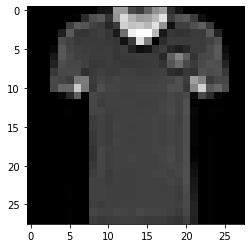

In [61]:
drawImg(X_test[59])

In [63]:
model.predict_classes(X_test[59].reshape(1, 28,28, 1))

array([0])

In [65]:
y_test[59].argmax()

0